# torchvision.datasets 模块
## 1、pytorch官方支持下载的数据集
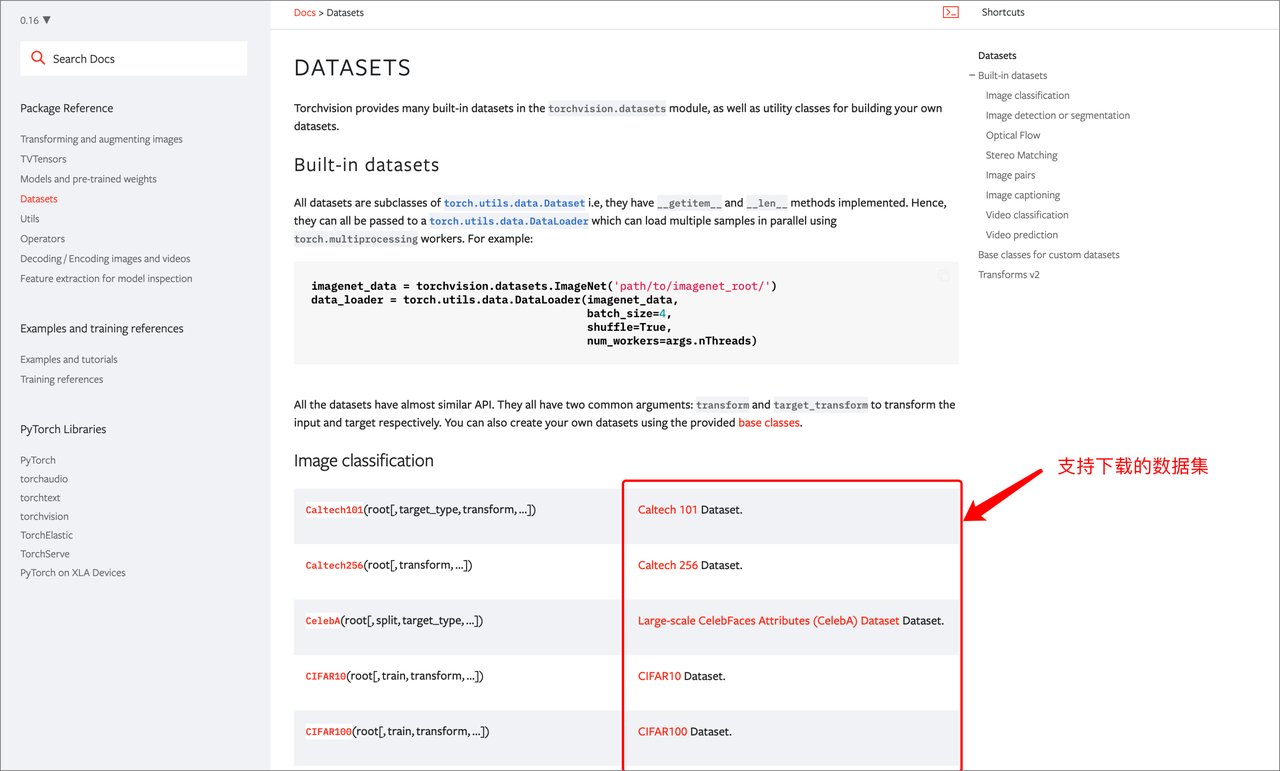

## 2、torchvision.datasets 模块
以获取 MNIST 数据集为例 

MNIST  全称：mixed national institute of standards and technology database

In [ ]:
train_dataset = torchvision.datasets.MNIST(root,
                                           train=True,
                                           transform=transform,
                                           download=True)

# 参数 ：
# root ：指定数据集下载到哪里
# train：如果是True, 下载训练集 trainin.pt； 如果是False，下载测试集 test.pt。  默认是True
# transform：一系列作用在PIL图片上的转换操作，返回一个数据处理后的版本。
# download：是否下载到 root指定的位置，如果指定的root位置已经存在该数据集，则不再下载

## 3、代码举例 ： 下载 MNIST 数据集
因为是单通道，所以 transforms.Normalize 的均值和标准差 仅指定了一个值

记得把数据集的下载地址换掉，换成你想要它下载到的位置

In [ ]:
import torch
import torchvision
from torchvision.transforms import transforms
import matplotlib.pyplot as plt

batch_size = 5

my_transform = transforms.Compose([transforms.ToTensor(),
                                   transforms.Normalize(mean=[0.5],   # mean=[0.485, 0.456, 0.406]
                                                        std=[0.5])])  # std=[0.229, 0.224, 0.225]

train_dataset = torchvision.datasets.MNIST(root="./",
                                                  train=True,
                                                  transform=my_transform,
                                                  download=True)

val_dataset = torchvision.datasets.MNIST(root="./",
                                         train=False,
                                         transform=my_transform,
                                         download=True)

train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

print(len(train_dataset))
print(len(train_loader))

iterator = iter(train_loader)
image, label = next(iterator)
print(image.shape)
print(label)

for i in range(batch_size):
    plt.subplot(1, batch_size, i+1)
    plt.title(label[i].item())
    plt.axis("off")
    plt.imshow(image[i].permute(1, 2, 0))

plt.show()

# torchvision.datasets.CocoDetection
torchvision.datasets.CocoDetection 不支持 COCO 数据集下载

在使用 torchvision.datasets.CocoDetection 之前，需要确保已经下载并淮备好COCO数据集的图像和标注文件。

然后使用 torchvision.datasets.CocoDetection 类来加载 COCO数据集。

In [ ]:
torchvision.datasets.CocoDetection(root,
                                   annFile,
                                   transform=None,
                                   target_transform=None,
                                   transforms=None)

# 参数 ：
# root  :  指定图片地址 （本地已经下载下来的图像地址）
# annFile  :  指定标注文件地址（ 本地已经下载下来的标注文件地址）
# transform  :  图像处理 (用于PIL)
# target_transform  :  标注处理
# transforms  :  图像和标注的处理

使用举例：

记得把数据集的下载地址换掉，换成你的 COCO数据集地址

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision.transforms import functional as F
import random


def collate_fn_coco(batch):
    return tuple(zip(*batch))

coco_det = datasets.CocoDetection(root="./COCO2017/train2017",
                                  annFile="./COCO2017/annotations/instances_train 2017.json")


sampler = torch.utils.data.SequentialSampler(coco_det)  # RandomSampler
batch_sampler = torch.utils.data.BatchSampler(sampler, 1, drop_last=True)
data_loader = torch.utils.data.DataLoader(coco_det,
                                          batch_sampler=batch_sampler,
                                          collate_fn=collate_fn_coco)

# 可视化
iterator = iter(data_loader)
imgs, gts = next(iterator)
img,  gts_one_img = imgs[0], gts[0]

bboxes = []
ids = []
for gt in gts_one_img:
    bboxes.append([gt['bbox'][0],
                   gt['bbox'][1],
                   gt['bbox'][2],
                   gt['bbox'][3]
                   ])
    ids.append(gt['category_id'])

fig, ax = plt.subplots()
for box, id in zip(bboxes, ids):
    x = int(box[0])
    y = int(box[1])
    w = int(box[2])
    h = int(box[3])
    rect = plt.Rectangle((x, y), w, h, edgecolor='r', linewidth=2, facecolor='none')
    ax.add_patch(rect)
    ax.text(x, y, id, backgroundcolor="r")

plt.axis("off")
plt.imshow(img)
plt.show()